<a href="https://colab.research.google.com/github/Sanvee0306/Assignments_DS/blob/main/Assign_Neural_Network_Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv("/content/forestfires (1).csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,daymon,daysat,daysun,daythu,daytue,daywed,monthapr,monthaug,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,small


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
### By Using PCA 

In [6]:
data1= data.iloc[:,2:30]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(data1)
df_norm = sc.transform(data1)
df_norm                     #Normalised dataset

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 28)
pca_values = pca.fit_transform(df_norm)
pca_values

array([[ 3.76670947e+00, -1.32025451e+00, -8.43971398e-01, ...,
        -6.53345819e-02, -6.05082538e-15, -1.58743875e-16],
       [ 3.90786263e-01,  8.31061522e-01, -1.10136513e+00, ...,
         3.42618601e-02, -2.67236885e-15, -6.92610536e-16],
       [ 6.90415596e-01,  1.17774562e+00, -1.22199841e+00, ...,
         2.63235187e-02,  5.92028990e-15,  8.36530871e-16],
       ...,
       [ 9.21634000e-01, -2.64543072e-01,  2.71921606e+00, ...,
        -2.97865814e-01, -6.98934052e-16,  4.03200598e-18],
       [-1.62054896e+00, -9.78838231e-01,  3.31987355e-01, ...,
         3.91949863e-02,  5.57925976e-16, -3.39227990e-17],
       [ 4.07590654e+00, -3.67440726e-01, -2.47151775e-01, ...,
        -2.50420726e-02,  6.17289277e-17, -8.31075187e-17]])

In [8]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([1.35522746e-01, 6.85788793e-02, 6.23572652e-02, 5.32713255e-02,
       4.75942360e-02, 4.68009902e-02, 4.37490015e-02, 4.28025164e-02,
       4.08875728e-02, 4.01633268e-02, 3.92926854e-02, 3.83232321e-02,
       3.64221503e-02, 3.63217289e-02, 3.57856782e-02, 3.50087806e-02,
       3.35447704e-02, 3.24777366e-02, 3.04490902e-02, 3.00246758e-02,
       2.37167400e-02, 2.08329788e-02, 1.18357869e-02, 8.88449559e-03,
       4.55347471e-03, 7.98135931e-04, 2.67271490e-32, 3.42850975e-33])

In [9]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([13.55, 20.41, 26.65, 31.98, 36.74, 41.42, 45.79, 50.07, 54.16,
       58.18, 62.11, 65.94, 69.58, 73.21, 76.79, 80.29, 83.64, 86.89,
       89.93, 92.93, 95.3 , 97.38, 98.56, 99.45, 99.91, 99.99, 99.99,
       99.99])

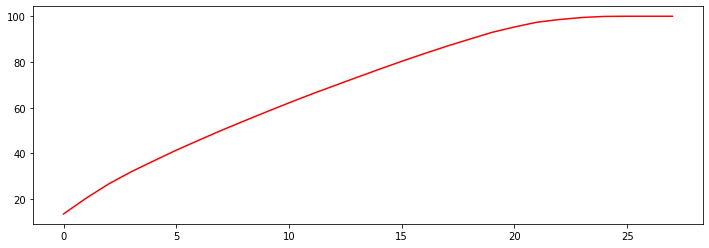

In [10]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

In [11]:
# Selecting first 24 PCA out of 28
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:24],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7',
                                                             'pc8','pc9','pc10','pc11','pc12','pc13','pc14',
                                                             'pc15','pc16','pc17','pc18','pc19','pc20','pc21',
                                                             'pc22','pc23','pc24']),
                     data[['size_category']]], axis = 1)
finalDf.size_category.replace(('large','small'),(1,0),inplace=True)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12,pc13,pc14,pc15,pc16,pc17,pc18,pc19,pc20,pc21,pc22,pc23,pc24,size_category
0,3.766709,-1.320255,-0.843971,-1.994738,-1.453359,0.693985,0.308104,-0.019764,0.010161,-0.437314,-0.536738,1.234550,0.276198,-0.671216,-0.529599,-0.197543,-0.021839,0.688958,0.563603,-0.439596,-0.926619,-0.405425,-0.118719,-0.017933,0
1,0.390786,0.831062,-1.101365,1.400671,2.869388,0.965898,-2.795574,0.041095,-0.548879,0.104500,-2.876498,-0.568255,2.095225,1.417634,-0.879983,-2.503167,0.499649,0.563706,-0.703319,-1.535718,-0.892995,0.836590,0.204975,0.290771,0
2,0.690416,1.177746,-1.221998,2.442038,1.090630,0.390801,-1.586675,-2.159336,-0.090580,0.260888,-3.236229,-0.601439,1.998004,1.477351,-0.946682,-2.545144,-0.658411,-0.423618,0.860550,-1.195230,-0.297870,0.743648,0.081757,0.345915,0
3,3.359951,-1.161443,0.385728,-2.118328,-1.949601,1.027664,-0.179422,-0.250227,-0.620329,-1.343189,-0.145846,1.019492,0.576990,-0.752744,0.349346,-0.040887,0.017843,0.332572,1.164745,-1.632741,-0.817618,1.523710,-0.342302,-0.378420,0
4,2.974329,-0.842626,1.327788,0.038086,-1.124763,-0.574676,-0.777155,0.303635,0.861126,-2.024719,-0.467108,1.131879,-0.137990,-0.823316,0.402298,0.844431,1.014944,-0.618231,0.822853,-1.794109,-0.723371,2.020419,-0.545591,0.161735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.087560,0.153964,1.241810,1.536581,0.372425,-1.133422,-0.362287,0.766946,0.818745,-0.289632,-0.933909,0.161275,-0.398215,0.197490,-0.801640,0.300522,0.513876,0.539642,-0.052958,1.898628,-1.441786,-0.821192,-1.205707,-0.698666,1
513,0.794366,-0.083966,2.670485,0.284995,0.223323,-0.904232,-0.014849,0.107226,1.340049,-0.147246,-0.652051,-0.132893,-0.518732,0.162358,-0.274733,0.342367,0.485571,0.580150,0.384984,0.086251,-0.970693,-1.353365,-1.254890,-1.212175,1
514,0.921634,-0.264543,2.719216,-0.019643,0.242195,-0.966939,-0.118080,0.123010,1.290364,-0.177553,-0.657663,-0.083060,-0.285899,0.062647,-0.494765,0.332816,0.344047,0.122409,0.313948,0.211157,-0.777731,-1.736711,-1.154127,-1.230040,1
515,-1.620549,-0.978838,0.331987,1.256638,-0.408164,0.735698,0.815510,-1.398344,0.076379,-0.005814,-0.503898,0.174276,-0.163149,0.246912,-0.147679,-0.011739,-1.035533,-0.774382,-0.216315,0.515791,0.080575,-0.055548,-0.067502,-0.311027,0


In [13]:
# split into input (X) and output (Y) variables
array = finalDf.values
X = array[:,0:24]
Y = array[:,24]

X.reshape(-1,1)
Y.reshape(-1,1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

**Iteration 1**

In [19]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)


Epoch 1/150
37/37 [==============================] - 1s 7ms/step - loss: 0.6231 - accuracy: 0.7548 - val_loss: 0.6613 - val_accuracy: 0.6731
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5284 - accuracy: 0.7890 - val_loss: 0.6572 - val_accuracy: 0.6731
Epoch 3/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5481 - accuracy: 0.7574 - val_loss: 0.6566 - val_accuracy: 0.6731
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.7626 - val_loss: 0.6624 - val_accuracy: 0.6731
Epoch 5/150
37/37 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7490 - val_loss: 0.6655 - val_accuracy: 0.6731
Epoch 6/150
37/37 [==============================] - 0s 3ms/step - loss: 0.4837 - accuracy: 0.7812 - val_loss: 0.6705 - val_accuracy: 0.6731
Epoch 7/150
37/37 [==============================] - 0s 3ms/step - loss: 0.5134 - accuracy: 0.7694 - val_loss: 0.6698 - val_accuracy: 0.6731
Epoch 8/150
3

In [20]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


17/17 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.9381
accuracy: 93.81%


**Iteration 2**

In [21]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=24, activation='sigmoid'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(1,activation='relu'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, validation_split=0.3, epochs=100, batch_size=15)


Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 0.6843 - accuracy: 0.5452 - val_loss: 0.6339 - val_accuracy: 0.6667
Epoch 2/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5357 - accuracy: 0.7885 - val_loss: 0.6403 - val_accuracy: 0.6795
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5404 - accuracy: 0.7711 - val_loss: 0.6307 - val_accuracy: 0.6795
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5577 - accuracy: 0.7512 - val_loss: 0.6291 - val_accuracy: 0.6795
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5065 - accuracy: 0.8006 - val_loss: 0.6321 - val_accuracy: 0.6795
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5434 - accuracy: 0.7549 - val_loss: 0.6339 - val_accuracy: 0.6795
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.5261 - accuracy: 0.7580 - val_loss: 0.6278 - val_accuracy: 0.6795
Epoch 8/100


In [22]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


17/17 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8627
accuracy: 86.27%


**Iteration 3**

In [23]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='relu'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, validation_split=0.3, epochs=100, batch_size=15)


Epoch 1/100
25/25 [==============================] - 1s 10ms/step - loss: 3.6394 - accuracy: 0.4589 - val_loss: 4.4040 - val_accuracy: 0.3974
Epoch 2/100
25/25 [==============================] - 0s 10ms/step - loss: 1.9339 - accuracy: 0.5484 - val_loss: 4.1389 - val_accuracy: 0.4103
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 1.9053 - accuracy: 0.5143 - val_loss: 3.6594 - val_accuracy: 0.3974
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3073 - accuracy: 0.5985 - val_loss: 3.5417 - val_accuracy: 0.4038
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 1.5925 - accuracy: 0.6071 - val_loss: 3.3774 - val_accuracy: 0.4167
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 1.3265 - accuracy: 0.5854 - val_loss: 3.3256 - val_accuracy: 0.4359
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1862 - accuracy: 0.6061 - val_loss: 2.6995 - val_accuracy: 0.4551
Epoch 8/100

In [24]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


17/17 [==============================] - 0s 1ms/step - loss: 0.8594 - accuracy: 0.7911
accuracy: 79.11%


**Iteration 4**

In [25]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=24, activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='relu'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, validation_split=0.3, epochs=150, batch_size=10)


Epoch 1/150
37/37 [==============================] - 1s 7ms/step - loss: 3.4905 - accuracy: 0.5723 - val_loss: 4.0503 - val_accuracy: 0.5769
Epoch 2/150
37/37 [==============================] - 0s 3ms/step - loss: 2.7548 - accuracy: 0.6651 - val_loss: 3.9540 - val_accuracy: 0.5833
Epoch 3/150
37/37 [==============================] - 0s 3ms/step - loss: 3.0072 - accuracy: 0.6366 - val_loss: 3.6995 - val_accuracy: 0.5962
Epoch 4/150
37/37 [==============================] - 0s 3ms/step - loss: 3.0260 - accuracy: 0.5931 - val_loss: 3.5853 - val_accuracy: 0.5962
Epoch 5/150
37/37 [==============================] - 0s 3ms/step - loss: 2.4582 - accuracy: 0.6601 - val_loss: 3.3272 - val_accuracy: 0.6218
Epoch 6/150
37/37 [==============================] - 0s 3ms/step - loss: 2.1608 - accuracy: 0.6951 - val_loss: 3.3041 - val_accuracy: 0.6218
Epoch 7/150
37/37 [==============================] - 0s 3ms/step - loss: 2.0308 - accuracy: 0.7053 - val_loss: 3.1990 - val_accuracy: 0.6346
Epoch 8/150
3

In [26]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


17/17 [==============================] - 0s 1ms/step - loss: 1.0411 - accuracy: 0.8685
accuracy: 86.85%


# Out Of All The 4 Iterations We Are Getting Best Accuracy With Iteration 1 which is **accuracy: 93.81%**.
